<a href="https://colab.research.google.com/github/Nkashyap-anand/human-posture-estimation/blob/main/64_TF_CNN_human_posture_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
from time import sleep as s
import cv2
import os
import pandas as pd
import random as rm

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/training",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
validation_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/validation",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
test_dataset = train.flow_from_directory("/content/drive/MyDrive/posture/testing",
                                    target_size= (512,512),
                                    batch_size= 4,
                                    class_mode="categorical")

Found 2880 images belonging to 4 classes.
Found 960 images belonging to 4 classes.
Found 960 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64,(3,3),activation ="relu", input_shape =(512,512,3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
# tf.keras.layers.Conv2D(128,(3,3),activation ="relu"),
# tf.keras.layers.MaxPool2D(2,2),
# tf.keras.layers.Conv2D(256,(3,3),activation ="relu"),
# tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation = "relu"),
tf.keras.layers.Dense(4,activation ="softmax")])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0

In [ ]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" ,metrics =["accuracy"])

In [ ]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch= 32,
                     epochs= 50,
                     validation_data= validation_dataset)

Epoch 1/50
32/32 [==============================] - 437s 14s/step - loss: 2.1211 - accuracy: 0.4062 - val_loss: 0.8961 - val_accuracy: 0.6427
Epoch 2/50
32/32 [==============================] - 46s 1s/step - loss: 0.8841 - accuracy: 0.6719 - val_loss: 0.8818 - val_accuracy: 0.6385
Epoch 3/50
32/32 [==============================] - 44s 1s/step - loss: 0.8047 - accuracy: 0.6875 - val_loss: 0.7934 - val_accuracy: 0.7031
Epoch 4/50
32/32 [==============================] - 43s 1s/step - loss: 0.7134 - accuracy: 0.7344 - val_loss: 0.7686 - val_accuracy: 0.7104
Epoch 5/50
32/32 [==============================] - 46s 1s/step - loss: 0.6745 - accuracy: 0.7578 - val_loss: 0.6559 - val_accuracy: 0.7531
Epoch 6/50
32/32 [==============================] - 38s 1s/step - loss: 0.6450 - accuracy: 0.7891 - val_loss: 0.6654 - val_accuracy: 0.7458
Epoch 7/50
32/32 [==============================] - 37s 1s/step - loss: 0.5664 - accuracy: 0.7969 - val_loss: 0.6679 - val_accuracy: 0.7427
Epoch 8/50
32/32 [

In [ ]:
test_predictions = model.predict(test_dataset)
test_predictions

array([[3.4859963e-03, 1.4103750e-04, 8.7431663e-01, 1.2205640e-01],
       [1.6885265e-04, 9.9975616e-01, 7.2546616e-05, 2.4139993e-06],
       [9.9526608e-01, 4.2981548e-05, 3.7718328e-05, 4.6533188e-03],
       ...,
       [8.6385584e-01, 1.0670192e-02, 2.9563116e-02, 9.5910802e-02],
       [9.9216813e-01, 9.3946837e-06, 7.1537849e-03, 6.6877715e-04],
       [3.3258082e-04, 1.7822093e-05, 1.1626437e-03, 9.9848688e-01]],
      dtype=float32)

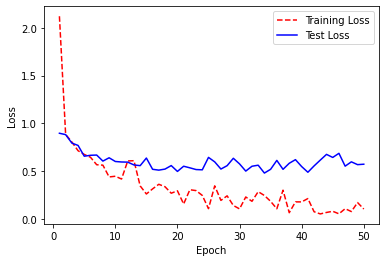

In [ ]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = model_fit.history['loss']
test_loss = model_fit.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

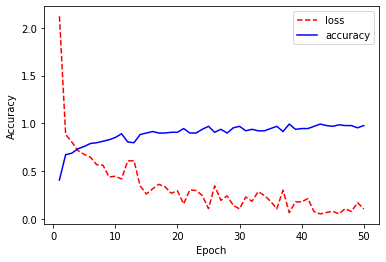

In [ ]:
loss = model_fit.history['loss']
accuracy = model_fit.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['loss', 'accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();